#   -------- Machine Learning Predictions on Global Terrorism --------

In [521]:
import os
os.getcwd()
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics, preprocessing
import os
%matplotlib inline 
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
#import sklearn
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
import codecs
from subprocess import check_output

In [522]:
cr = pd.read_csv("/content/globalterrorim.csv",encoding='iso-8859-1')
cr.tail(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181681,201712310016,2017,12,31,NaN,0,NaN,160,Philippines,5,...,The victims included Senior Police Officer 4 M...,"""3 dead, scores injured in Mindanao blasts,"" M...","""Cop, 2 others killed in bomb blasts in Mindan...","""Cop killed, 7 injured in Maguindanao IED blas...",START Primary Collection,0,0,0,0,NaN
181682,201712310017,2017,12,31,NaN,0,NaN,98,Italy,8,...,NaN,"""Arson attack probed as racial crime,"" Ansa.it...","""Ascoli, a building destined for migrants goes...",NaN,START Primary Collection,-9,-9,0,-9,NaN
181683,201712310018,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Six Members Of One Family Shot Dead In Faryab...","""Highlights: Pakistan Pashto Press 02 January ...",NaN,START Primary Collection,0,0,0,0,NaN
181684,201712310019,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Abducted PSO rescued within 11 hours,"" The Se...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181685,201712310020,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""4 people injured in Farayb explosion,"" Pajhwo...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [523]:
print(cr.shape)

(181691, 135)


In [524]:
newdf=cr[["iyear","iday","success","attacktype1","targtype1","natlty1","weaptype1","nkill","extended","country","region",
          "latitude","longitude","specificity","vicinity","crit1","suicide","nperps"]]

In [525]:
terror = cr.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=False)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']

terror.head(3)


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [526]:
cr["iyear"].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [527]:
terror["AttackType"].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

In [528]:
newdf["targtype1"].value_counts()

14    43511
4     27984
3     24506
2     21283
1     20669
19     6799
21     6023
20     5898
15     4440
8      4322
7      3573
17     3039
10     2948
22     1866
6      1343
16     1009
12      970
18      440
11      351
9       317
5       263
13      137
Name: targtype1, dtype: int64

In [529]:
newdf["weaptype1"].value_counts()

6     92426
5     58524
13    15157
8     11135
9      3655
2       321
11      141
10      136
12      114
1        35
7        33
3        14
Name: weaptype1, dtype: int64

In [530]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [531]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


In [532]:
print(f"""
    There are {terror.Country.nunique()} countries from {terror.Region.nunique()} regions covered in the dataset and terrorist atacks data in {terror.Year.nunique()}
    years from {terror.Year.min()} to {terror.Year.max()}. Overally {terror.index.nunique()} terrorist attacks are recorded here which caused about {int(terror.casualities.sum())} casualities
    consisted of {int(terror.Killed.sum())} kills and {int(terror.Wounded.sum())} wounded.
""")


    There are 205 countries from 12 regions covered in the dataset and terrorist atacks data in 47
    years from 1970 to 2017. Overally 181691 terrorist attacks are recorded here which caused about 872892 casualities
    consisted of 411868 kills and 523869 wounded.



In [533]:
print(f"The highest terrorist attacks were commited in {terror.Country.value_counts().index[0]} with {terror.Country.value_counts().max()} attacks")

print('The other 4 countries with highest terrorist attacks are:')
for i in range(1,4):
    print(f"{i+1}. {terror.Country.value_counts().index[i]} with {terror.Country.value_counts()[i]} attacks")

The highest terrorist attacks were commited in Iraq with 24636 attacks
The other 4 countries with highest terrorist attacks are:
2. Pakistan with 14368 attacks
3. Afghanistan with 12731 attacks
4. India with 11960 attacks


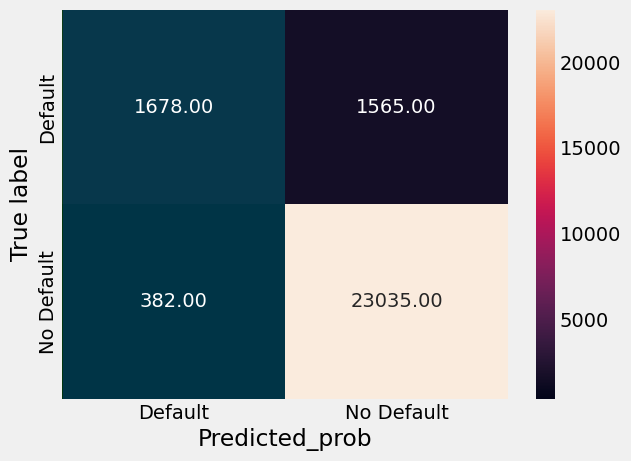

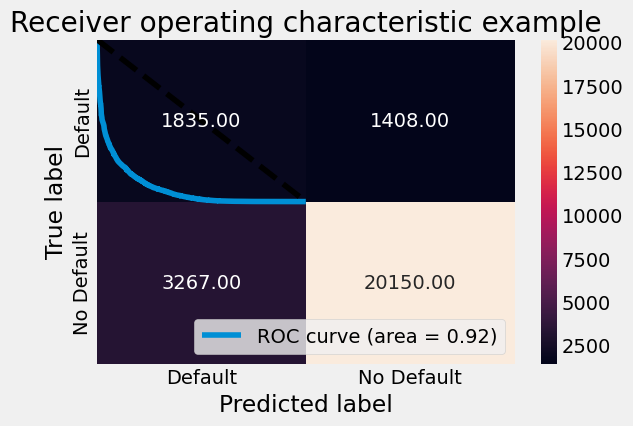

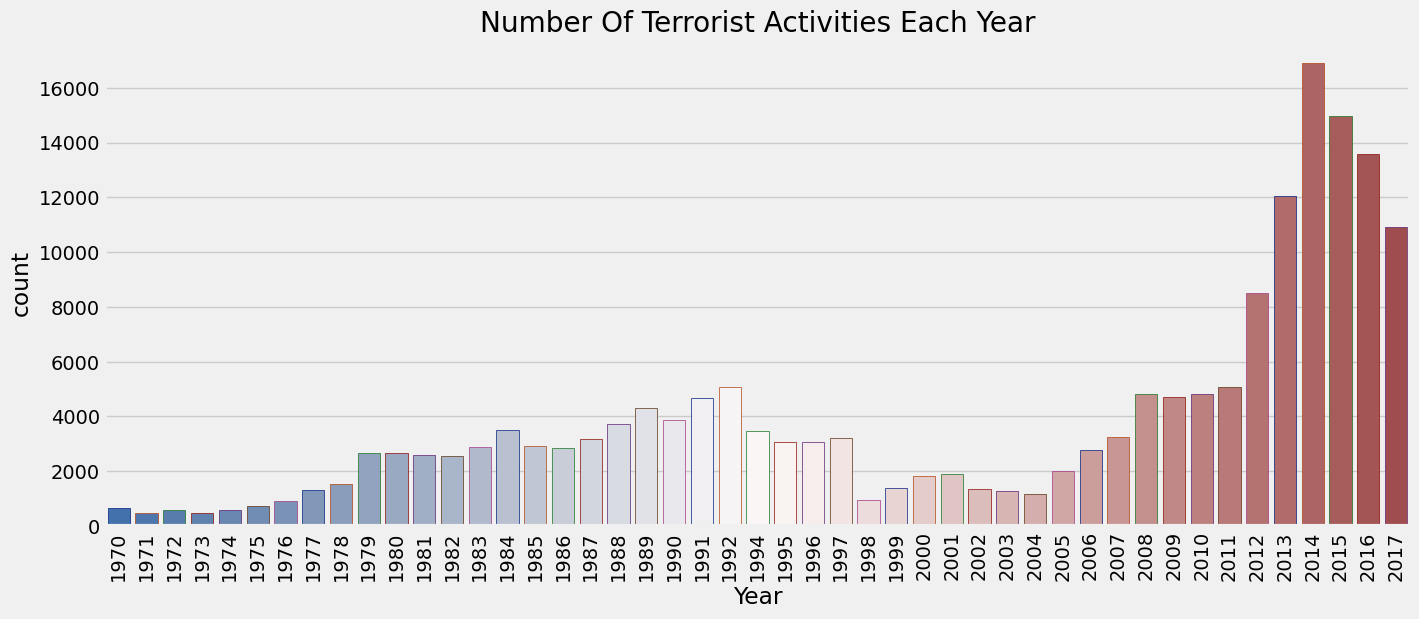

In [534]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', data=terror, palette='vlag', edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

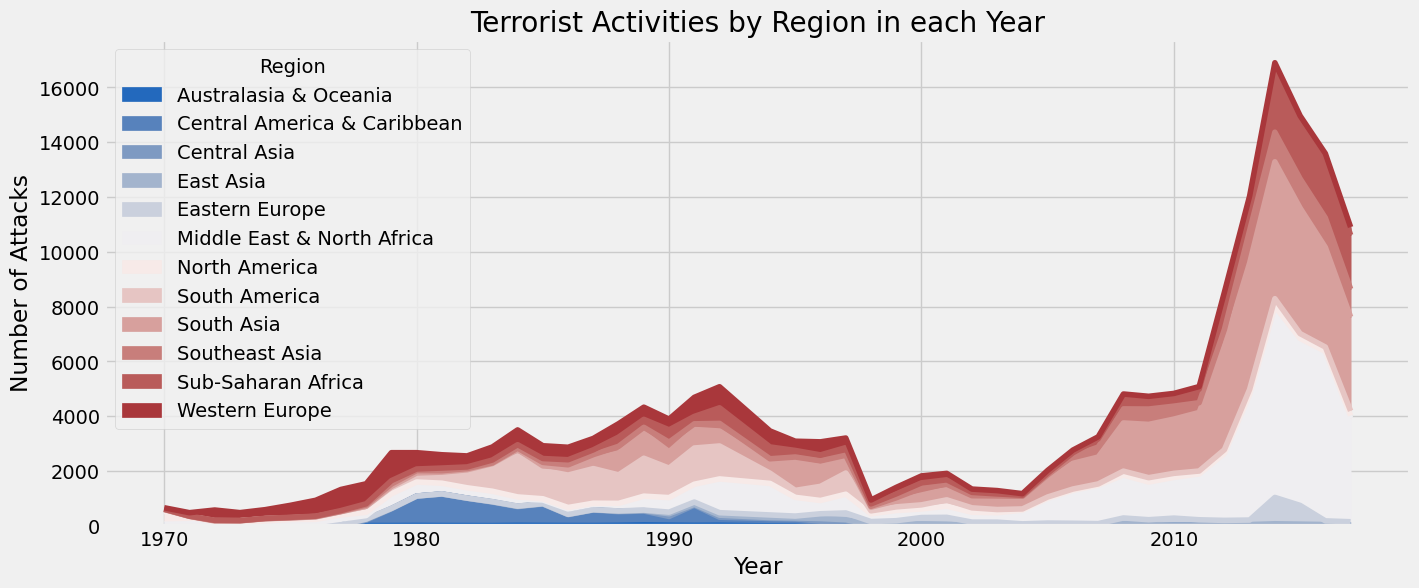

In [535]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6),colormap="vlag")
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

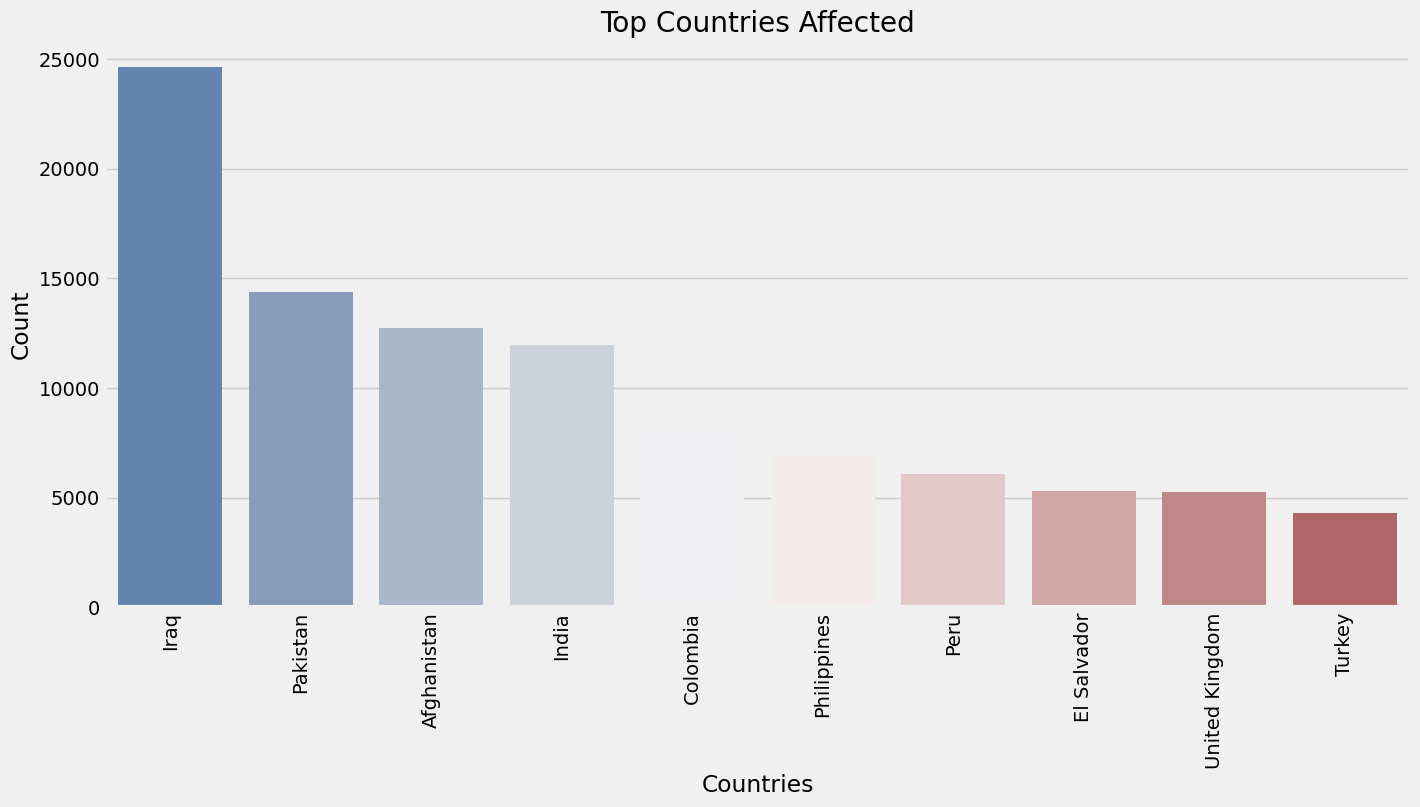

In [536]:
plt.subplots(figsize=(15,7))
top_countries = terror['Country'].value_counts()[:10].to_frame().reset_index()
top_countries.columns = ['Country', 'Count']
sns.barplot(x='Country', y='Count', data=top_countries, palette='vlag')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

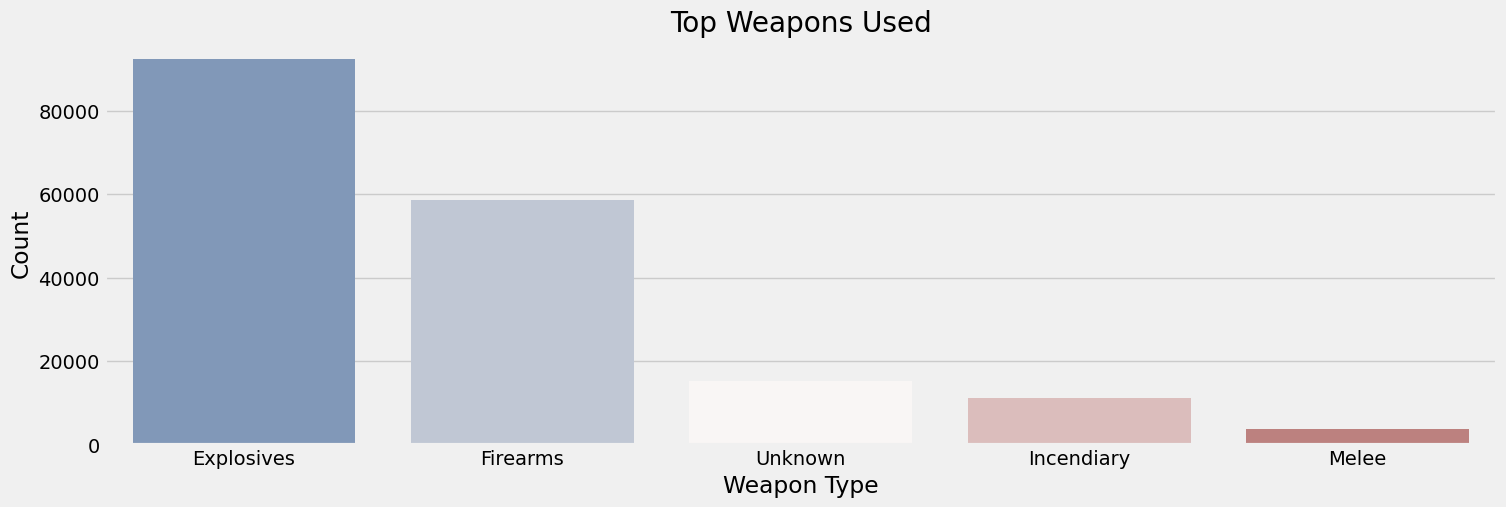

In [537]:
plt.subplots(figsize=(16,5))


top_Weapons = terror['Weapon_type'].value_counts()[:5].to_frame().reset_index()
top_Weapons.columns = ['Weapon_type', 'Count']
sns.barplot(x='Weapon_type', y='Count', data=top_Weapons, palette='vlag')



plt.title('Top Weapons Used')
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.xticks()
plt.show()

<Axes: ylabel='Weapon_type'>

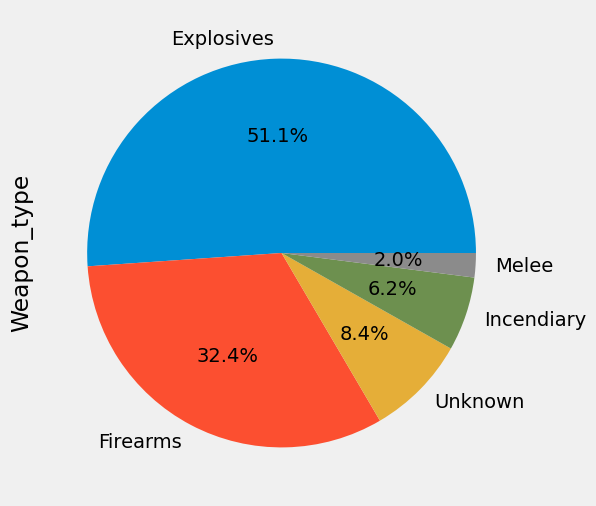

In [538]:
top5_Weapon=terror['Weapon_type'].value_counts()[:5]
top5_Weapon.plot(kind='pie',autopct="%1.1f%%",figsize=(7,6))

<Axes: ylabel='Region'>

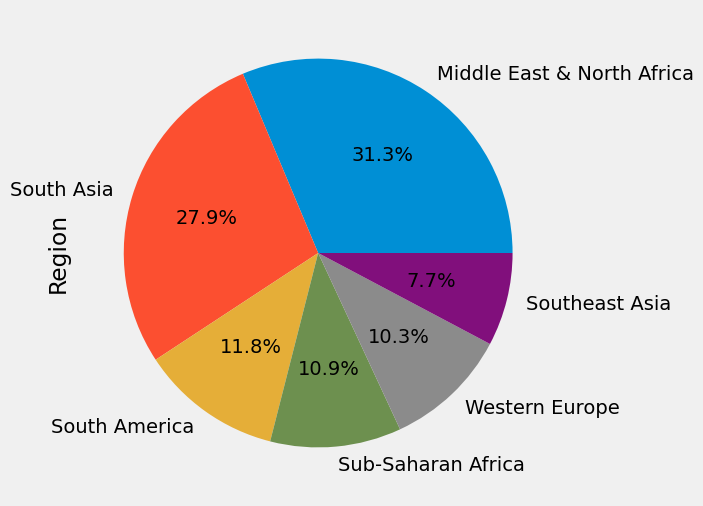

In [539]:
top5_Region=terror['Region'].value_counts()[:6]
top5_Region.plot(kind='pie',autopct="%1.1f%%",figsize=(7,6))

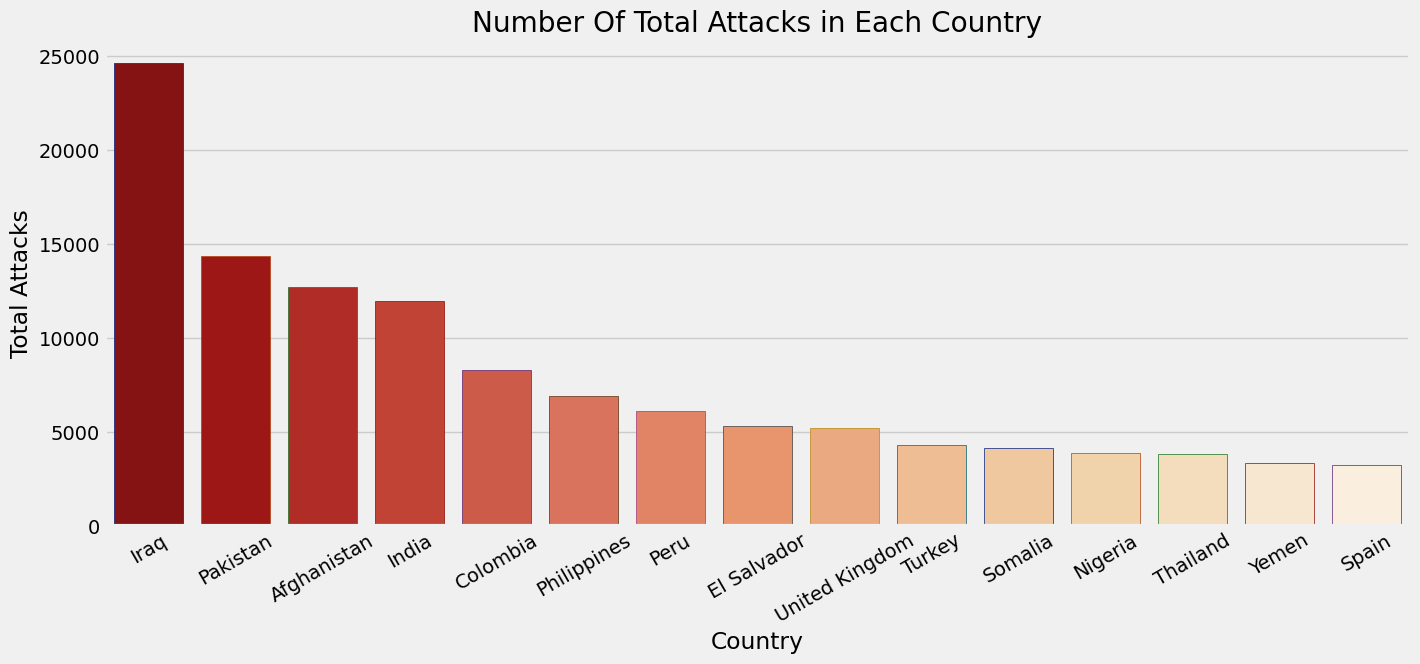

In [540]:
plt.subplots(figsize=(15,6))
country_attacks = terror.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number Of Total Attacks in Each Country')
plt.show()

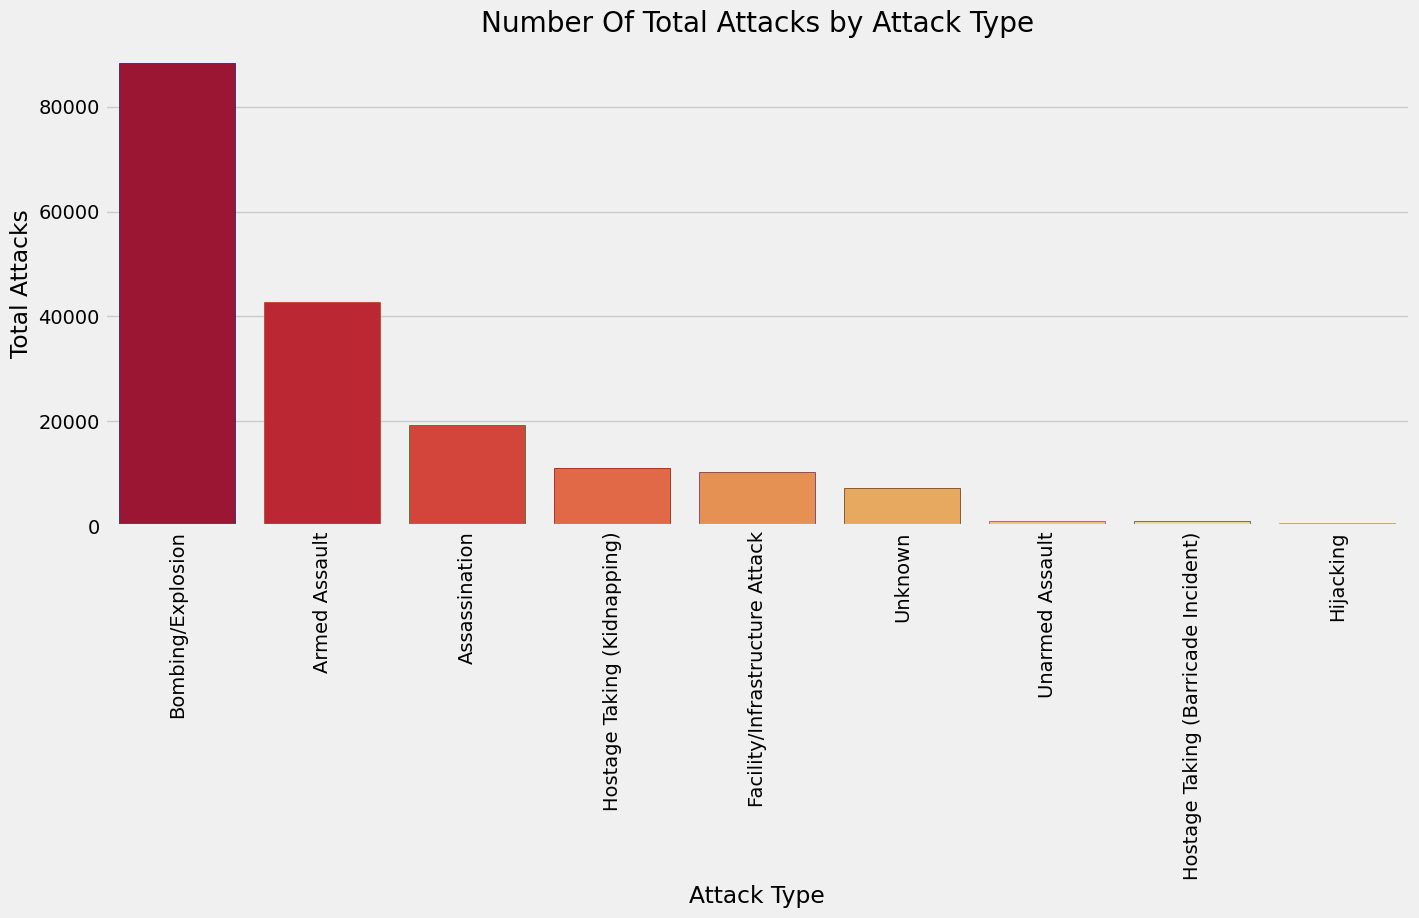

In [541]:
attack_type = terror.AttackType.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'], palette='YlOrRd_r',
            edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks by Attack Type')
plt.show()

In [542]:
ss=newdf.dropna()

In [543]:
ss.dtypes

iyear            int64
iday             int64
success          int64
attacktype1      int64
targtype1        int64
natlty1        float64
weaptype1        int64
nkill          float64
extended         int64
country          int64
region           int64
latitude       float64
longitude      float64
specificity    float64
vicinity         int64
crit1            int64
suicide          int64
nperps         float64
dtype: object

In [544]:
print(f"""
    There are {ss.country.nunique()} countries from {ss.region.nunique()} regions covered in the dataset and terrorist atacks data in {ss.iyear.nunique()}
    years from {ss.iyear.min()} to {ss.iyear.max()}. 
""")


    There are 186 countries from 12 regions covered in the dataset and terrorist atacks data in 47
    years from 1970 to 2017. 



# Predicting Success 

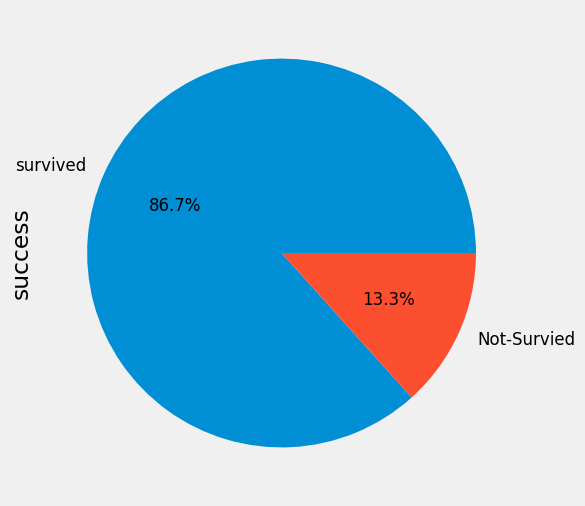

In [545]:
fig = plt.figure(figsize=(10,6))
ax = (ss['success'].value_counts()*100.0 /len(ss)).plot.pie(autopct='%.1f%%', labels = ['survived', 'Not-Survied'],
         fontsize=12)

In [546]:
X = ss.drop(['success'], axis=1, inplace=False)
X

,iyear,iday,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,suicide,nperps
1,1970,0,6,7,21.0,13,0.0,0,130,1,19.371887,-99.086624,1.0,0,1,0,7.0
5,1970,1,2,3,217.0,5,0.0,0,217,1,37.005105,-89.176269,1.0,0,1,0,-99.0
6,1970,2,1,3,218.0,5,0.0,0,218,3,-34.891151,-56.187214,1.0,0,1,0,3.0
7,1970,2,3,21,217.0,6,0.0,0,217,1,37.791927,-122.225906,1.0,0,1,0,-99.0
8,1970,2,7,4,217.0,8,0.0,0,217,1,43.076592,-89.412488,1.0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,31,2,4,182.0,5,1.0,0,182,11,2.359673,45.385034,2.0,0,1,0,-99.0
181687,2017,31,3,4,167.0,6,2.0,0,200,10,35.407278,35.942679,1.0,1,1,0,-99.0
181688,2017,31,7,14,160.0,8,0.0,0,160,5,6.900742,124.437908,2.0,0,1,0,-99.0
181689,2017,31,3,2,92.0,6,0.0,0,92,6,24.798346,93.940430,1.0,0,1,0,-99.0


In [547]:
Y=ss['success']
Y

1         1
5         1
6         0
7         1
8         1
         ..
181686    1
181687    1
181688    1
181689    0
181690    0
Name: success, Length: 104040, dtype: int64

## Random Forest

In [548]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [549]:
clf = RandomForestClassifier(n_estimators = 500, random_state = 42)

In [550]:
# Instantiate model with 1000 decision trees
clf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
clf.fit(X_train_RF, y_train_RF);

# State is string and we want discreet integer values

In [551]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train_RF.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

In [552]:
feature_importances

,importance
targtype1,0.159575
latitude,0.119581
longitude,0.119101
attacktype1,0.118031
nkill,0.112401
iday,0.108000
iyear,0.078588
natlty1,0.032284
nperps,0.031588
country,0.030234


In [553]:
importances = clf.feature_importances_ 

[0.07858794 0.10799957 0.11803136 0.15957543 0.03228406 0.02980864
 0.11240133 0.00461431 0.03023426 0.01326542 0.11958129 0.11910071
 0.01867389 0.00944979 0.00171195 0.01309223 0.0315878 ]


<Axes: >

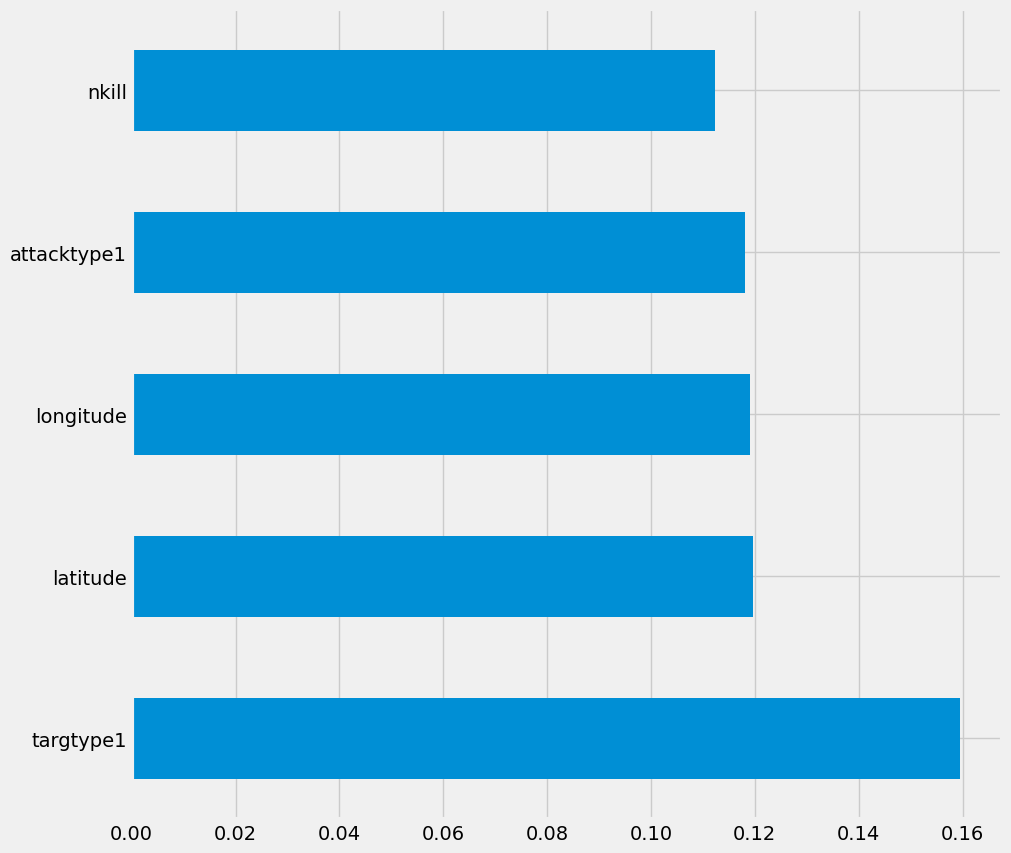

In [554]:

# Get Feature Importance from the classifier
feature_importance = clf.feature_importances_
print (clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X_train_RF.columns)
feat_importances = feat_importances.nlargest(5)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

[0.07858794 0.10799957 0.11803136 0.15957543 0.03228406 0.02980864
 0.11240133 0.00461431 0.03023426 0.01326542 0.11958129 0.11910071
 0.01867389 0.00944979 0.00171195 0.01309223 0.0315878 ]


<Axes: >

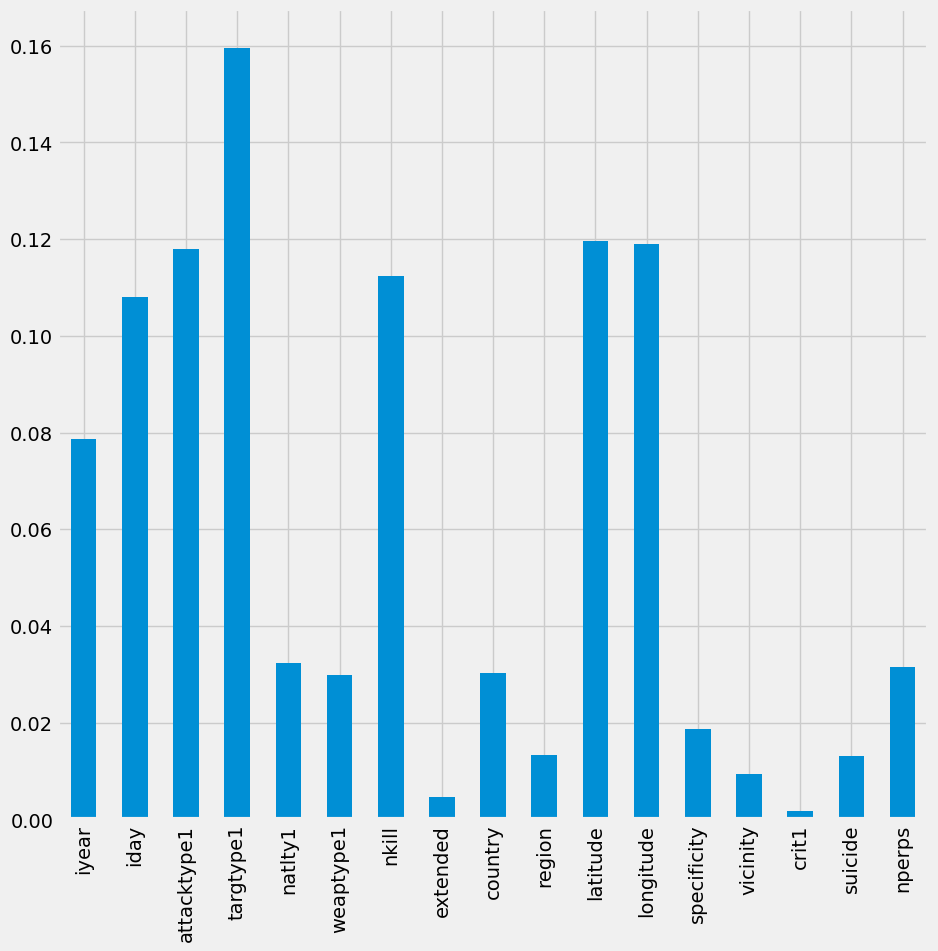

In [555]:
# Get Feature Importance from the classifier
feature_importance = clf.feature_importances_
print (clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X_train_RF.columns)
feat_importances = feat_importances
feat_importances.plot(kind='bar' , figsize=(10,10)) 

In [556]:
indices = np.argsort(importances)[::-1]

In [557]:
from sklearn.tree import export_graphviz
estimator = clf.estimators_[1] # number of trees to visualise
# Export as dot file
export_graphviz(estimator, out_file='RandomForest.dot', 
                feature_names = X_train_RF.columns,
                #class_names = y_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# file will be saved in current working directory

In [558]:
for f in range(X.shape[1]):
    if importances[indices[f]] > 0:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        print ("feature name: ", X.columns[indices[f]])

1. feature 3 (0.159575)
feature name:  targtype1
2. feature 10 (0.119581)
feature name:  latitude
3. feature 11 (0.119101)
feature name:  longitude
4. feature 2 (0.118031)
feature name:  attacktype1
5. feature 6 (0.112401)
feature name:  nkill
6. feature 1 (0.108000)
feature name:  iday
7. feature 0 (0.078588)
feature name:  iyear
8. feature 4 (0.032284)
feature name:  natlty1
9. feature 16 (0.031588)
feature name:  nperps
10. feature 8 (0.030234)
feature name:  country
11. feature 5 (0.029809)
feature name:  weaptype1
12. feature 12 (0.018674)
feature name:  specificity
13. feature 9 (0.013265)
feature name:  region
14. feature 15 (0.013092)
feature name:  suicide
15. feature 13 (0.009450)
feature name:  vicinity
16. feature 7 (0.004614)
feature name:  extended
17. feature 14 (0.001712)
feature name:  crit1


In [559]:
# use the model to make predictions with the test data
y_pred_RF = clf.predict(X_test_RF)

In [560]:
# combining 2 numpy arrays into one pandas dataframe
final_model_predictions_RF = pd.DataFrame({'Actual':y_test_RF, 'predictions':y_pred_RF})

In [561]:
final_model_predictions_RF.head()

,Actual,predictions
135079,1,1
151904,1,1
173677,1,1
169196,1,1
148161,1,1


In [562]:

# how did our model perform?
count_misclassified = (y_test_RF != y_pred_RF).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_RF = metrics.accuracy_score(y_test_RF, y_pred_RF)
print('Accuracy: {:.4f}'.format(accuracy_RF))


Misclassified samples: 2350
Accuracy: 0.9247


In [563]:
y_pred_prob = clf.predict_proba(X_test_RF)  # 2  columns for probability it is creating

In [564]:
y_pred_prob = clf.predict_proba(X_test_RF)[:,1]   # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1

In [565]:
final_model_predictions_RF['Predicted_prob'] = y_pred_prob

In [566]:
final_model_predictions_RF.head()

,Actual,predictions,Predicted_prob
135079,1,1,0.938000
151904,1,1,1.000000
173677,1,1,0.976026
169196,1,1,0.989000
148161,1,1,0.973000


In [567]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib 

Using matplotlib backend: agg


In [568]:

def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  # correct 0 is sensitivity and correct is specificity

In [569]:
draw_cm( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )   # correct 0 is sensitivity and correct is specificity

In [570]:

accuracy_RF=np.round( metrics.accuracy_score( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions  ),2)*100
accuracy_RF='{:.2f}'.format(accuracy_RF)
print( 'Total Accuracy : ',accuracy_RF )
recall_RF=metrics.recall_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('recall :',recall_RF)
precision_RF=metrics.precision_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('Precision :',precision_RF)

Total Accuracy :  92.00
recall : 0.9818577381171872
Precision : 0.9347726873793224


In [571]:
cm1 = metrics.confusion_matrix( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions)

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Sensitivity :  0.55
Specificity :  0.98


In [572]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib 


Using matplotlib backend: agg


In [573]:
sn.distplot( final_model_predictions_RF[final_model_predictions_RF.Actual == 1]["Predicted_prob"], kde=False, color = 'b' )
sn.distplot( final_model_predictions_RF[final_model_predictions_RF.Actual == 0]["Predicted_prob"], kde=False, color = 'g' )

<Axes: xlabel='Predicted_prob', ylabel='True label'>

In [574]:
auc_score = metrics.roc_auc_score( final_model_predictions_RF.Actual, final_model_predictions_RF.Predicted_prob  )
round( float( auc_score ), 2 )

0.92

In [575]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [576]:
fpr, tpr, thresholds = draw_roc( final_model_predictions_RF.Actual, final_model_predictions_RF.Predicted_prob )

In [577]:
columns=["Accuracy", "recall", "Precision "]

## K-Nearest Neighbors Algorithm
#### .


In [578]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [579]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_KNN)

X_train_knn = scaler.transform(X_train_KNN)
X_test_knn = scaler.transform(X_test_KNN)

In [580]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train_knn, y_train_KNN)

KNeighborsClassifier(n_neighbors=2)

In [581]:
y_pred_knn = classifier.predict(X_test_knn)

In [582]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_KNN, y_pred_knn))
print(classification_report(y_test_KNN, y_pred_knn))

[[ 2463  1630]
 [ 4074 23045]]
              precision    recall  f1-score   support

           0       0.38      0.60      0.46      4093
           1       0.93      0.85      0.89     27119

    accuracy                           0.82     31212
   macro avg       0.66      0.73      0.68     31212
weighted avg       0.86      0.82      0.83     31212



In [583]:
final_model_predictions_knn = pd.DataFrame({'Actual':y_test_KNN, 'predictions':y_pred_knn})

In [584]:
draw_cm( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )   # correct 0 is sensitivity and correct is specificity

In [585]:
accuracy_knn=metrics.accuracy_score( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)*100
accuracy_knn='{:.2f}'.format(accuracy_knn)
print( 'Total Accuracy : ',accuracy_knn)
recall_knn=metrics.recall_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )
print('recall',recall_knn)
Precision_knn=metrics.precision_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )
print('Precision',Precision_knn)

Total Accuracy :  81.72
recall 0.8497732217264649
Precision 0.9339412360688957


In [586]:
cm2 = metrics.confusion_matrix( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)

sensitivity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', round( specificity, 2 ) )

Sensitivity :  0.6
Specificity :  0.85


In [587]:
rows_knn=pd.DataFrame({"Algorithm":['Random Forest','K-Nearest Neighbors Algorithm'],"Accuracy":[accuracy_RF,accuracy_knn],"Recall":[recall_RF,recall_knn],"Precision ":[precision_RF,Precision_knn]})
rows_knn

,Algorithm,Accuracy,Recall,Precision
0,Random Forest,92.00,0.981858,0.934773
1,K-Nearest Neighbors Algorithm,81.72,0.849773,0.933941


## Linear Regression
#### .

In [588]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [589]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [590]:
lin_reg.fit(X_train_lr,y_train_lr)

LinearRegression()

In [591]:
y_pred_lr=lin_reg.predict(X_test_lr)

In [592]:
y_pred_lr

array([0.78940726, 0.89426508, 0.7930439 , ..., 0.88347114, 0.8762844 ,
       0.8965232 ])

In [593]:
y_pred_lrr=y_pred_lr.round()

In [594]:
final_model_predictions_lr = pd.DataFrame({'Actual':y_test_lr, 'predictions':y_pred_lrr})

In [595]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_lr, y_pred_lrr))
print(classification_report(y_test_lr, y_pred_lrr))

[[    0  4093     0]
 [    0 27117     2]
 [    0     0     0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      4093
         1.0       0.87      1.00      0.93     27119
         2.0       0.00      0.00      0.00         0

    accuracy                           0.87     31212
   macro avg       0.29      0.33      0.31     31212
weighted avg       0.75      0.87      0.81     31212



In [596]:
accuracy_lr=metrics.accuracy_score( final_model_predictions_lr.Actual, final_model_predictions_lr.predictions  )*100
accuracy_lr='{:.2f}'.format(accuracy_lr)
print( 'Total Accuracy : ',accuracy_lr)
recall_lr=metrics.recall_score(final_model_predictions_lr.Actual, final_model_predictions_lr.predictions,average='micro' )
print('recall',recall_lr)
Precision_lr=metrics.precision_score(final_model_predictions_lr.Actual, final_model_predictions_lr.predictions,average='micro' )
print('Precision',Precision_lr)

Total Accuracy :  86.88
recall 0.868800461361015
Precision 0.868800461361015


In [597]:
rows_knn=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr],"Recall":[recall_RF,recall_knn,recall_lr],"Precision ":[precision_RF,Precision_knn,Precision_lr]},index=["Random Forest","KNN","Linear Regression"])
rows_knn

,Accuracy,Recall,Precision
Random Forest,92.00,0.981858,0.934773
KNN,81.72,0.849773,0.933941
Linear Regression,86.88,0.868800,0.868800


## Decision Tree Classifier 
#### .

In [598]:
# import the regressor 
from sklearn.tree import DecisionTreeClassifier 

In [599]:
# create a regressor object 
decision_Tree_Classifier = DecisionTreeClassifier (random_state = 0) 



In [600]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [601]:
decision_Tree_Classifier.fit(X_train_DT, y_train_DT) 

DecisionTreeClassifier(random_state=0)

In [602]:
# predicting a new value 
  
# test the output by changing values, like 3750 
y_pred_DT = decision_Tree_Classifier.predict(X_test_DT) 
  

In [603]:
print(y_pred_DT)

[0 1 1 ... 1 1 1]


In [604]:
final_model_predictions_DT = pd.DataFrame({'Actual':y_test_DT, 'predictions':y_pred_DT})

In [605]:
final_model_predictions_DT.head()

,Actual,predictions
135079,1,0
151904,1,1
173677,1,1
169196,1,1
148161,1,1


In [606]:
# how did our model perform?
count_misclassified = (y_test_DT != y_pred_DT).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_DT = np.round(metrics.accuracy_score(y_test_DT, y_pred_DT),1)*100
print( 'Total Accuracy : ',accuracy_DT)

Misclassified samples: 3570
Total Accuracy :  90.0


In [607]:
print(confusion_matrix(y_test_DT, y_pred_DT))
print(classification_report(y_test_DT, y_pred_DT))

[[ 2442  1651]
 [ 1919 25200]]
              precision    recall  f1-score   support

           0       0.56      0.60      0.58      4093
           1       0.94      0.93      0.93     27119

    accuracy                           0.89     31212
   macro avg       0.75      0.76      0.76     31212
weighted avg       0.89      0.89      0.89     31212



In [608]:
accuracy_DT=np.round( metrics.accuracy_score( final_model_predictions_DT.Actual, final_model_predictions_DT.predictions  ),1)*100
accuracy_DT='{:.2f}'.format(accuracy_DT)
print( 'Total Accuracy : ',accuracy_DT)
recall_DT=metrics.recall_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('recall',recall_DT)
Precision_DT=metrics.precision_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('Precision',Precision_DT)

Total Accuracy :  90.00
recall 0.8856209150326797
Precision 0.8856209150326797


In [609]:
table_DT=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_DT],
                       "Recall":[recall_RF,recall_knn,recall_lr,recall_DT],
                       "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_DT]},
                      index=["Random Forest","KNN","Linear Regression","Decision Tree Classifier"])
table_DT

,Accuracy,Recall,Precision
Random Forest,92.00,0.981858,0.934773
KNN,81.72,0.849773,0.933941
Linear Regression,86.88,0.868800,0.868800
Decision Tree Classifier,90.00,0.885621,0.885621


## Support Vector Classifier 
#### .

In [610]:
x_svm=X.head(500)
y_svm=Y.head(500)
#support vector classifier works slow for large data sets. hence it is trimmed

In [611]:
X_train_SVC, X_test_SVC, y_train_SVC, y_test_SVC = train_test_split( x_svm, y_svm, test_size = 0.3, random_state = 100)

In [612]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clfsvm = SVC(kernel='linear') 

In [613]:
# fitting x samples and y classes 
clfsvm.fit(X_train_SVC,y_train_SVC) 

SVC(kernel='linear')

In [614]:
y_pred_SVC=clfsvm.predict(X_test_SVC)

In [615]:
final_model_predictions_SVC = pd.DataFrame({'Actual':y_test_SVC, 'predictions':y_pred_SVC})

In [616]:
# how did our model perform?
count_misclassified = (y_test_SVC != y_pred_SVC).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_SVC = metrics.accuracy_score(y_test_SVC, y_pred_SVC)
print('Accuracy: {:.2f}'.format(accuracy_SVC))

Misclassified samples: 30
Accuracy: 0.80


In [617]:
print(confusion_matrix(y_test_SVC, y_pred_SVC))
print(classification_report(y_test_SVC, y_pred_SVC))
print("-----------------------------------------------------------------------------------------------------------------------")

print("-----------------------------------------------------------------------------------------------------------------------")
accuracy_SVC=metrics.accuracy_score( final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions  )*100
accuracy_SVC='{:.2f}'.format(accuracy_SVC)
print( 'Total Accuracy : ',accuracy_SVC)
recall_SVC=metrics.recall_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('recall',recall_SVC)
Precision_SVC=metrics.precision_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('Precision',Precision_SVC)

[[  0  23]
 [  7 120]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.84      0.94      0.89       127

    accuracy                           0.80       150
   macro avg       0.42      0.47      0.44       150
weighted avg       0.71      0.80      0.75       150

-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  80.00
recall 0.8
Precision 0.8


In [618]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_DT,accuracy_SVC],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_DT,recall_SVC],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_DT,Precision_SVC]},
                   index=["Random Forest","KNN","Linear Regression","Decision Tree Classifier","Support Vector Classifier"])
table

,Accuracy,Recall,Precision
Random Forest,92.00,0.981858,0.934773
KNN,81.72,0.849773,0.933941
Linear Regression,86.88,0.868800,0.868800
Decision Tree Classifier,90.00,0.885621,0.885621
Support Vector Classifier,80.00,0.800000,0.800000


## Logistic Regression
#### .

In [619]:
from sklearn.linear_model import LogisticRegression

In [620]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [621]:
logmodel = LogisticRegression()
logmodel.fit(X_train_LR, y_train_LR)

LogisticRegression()

In [622]:
predictions_LR = logmodel.predict(X_test_LR)

In [623]:
predictions_LR

array([1, 1, 1, ..., 1, 1, 1])

In [624]:
final_model_predictions_LR = pd.DataFrame({'Actual':y_test_LR, 'predictions':predictions_LR})

In [625]:
count_misclassified = (y_test_LR != predictions_LR).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_LR, predictions_LR)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 4096
Accuracy: 0.87


In [626]:
print(confusion_matrix(y_test_LR, predictions_LR))
print(classification_report(y_test_LR, predictions_LR))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")
accuracy_LR=np.round(metrics.accuracy_score( final_model_predictions_LR.Actual, final_model_predictions_LR.predictions ),2 )*100
accuracy_LR='{:.2f}'.format(accuracy_LR)
print( 'Total Accuracy : ',accuracy_LR)
recall_LR=metrics.recall_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('recall',recall_LR)
Precision_LR=metrics.precision_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('Precision',Precision_LR)

[[    3  4090]
 [    6 27113]]
              precision    recall  f1-score   support

           0       0.33      0.00      0.00      4093
           1       0.87      1.00      0.93     27119

    accuracy                           0.87     31212
   macro avg       0.60      0.50      0.47     31212
weighted avg       0.80      0.87      0.81     31212

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  87.00
recall 0.8687684224016404
Precision 0.8687684224016404


In [627]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_DT,accuracy_SVC,accuracy_LR],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_DT,recall_SVC,recall_LR],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_DT,Precision_SVC,Precision_LR]},
                   index=["Random Forest","KNN","Linear Regression","Decision Tree Classifier","Support Vector Classifier","Logistic Regression"])
table

,Accuracy,Recall,Precision
Random Forest,92.00,0.981858,0.934773
KNN,81.72,0.849773,0.933941
Linear Regression,86.88,0.868800,0.868800
Decision Tree Classifier,90.00,0.885621,0.885621
Support Vector Classifier,80.00,0.800000,0.800000
Logistic Regression,87.00,0.868768,0.868768


## Linear Discriminant Analysis
#### .

In [628]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [629]:
clf_LDA = LinearDiscriminantAnalysis()

In [630]:
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [631]:
clf_LDA.fit(X_train_LDA, y_train_LDA)

LinearDiscriminantAnalysis()

In [632]:
predictions_LDA = clf_LDA.predict(X_test_LDA)

In [633]:
final_model_predictions_LDA = pd.DataFrame({'Actual':y_test_LDA, 'predictions':predictions_LDA})

In [634]:
count_misclassified = (y_test_LDA != predictions_LDA).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_LDA = metrics.accuracy_score(y_test_LDA, predictions_LDA)
accuracy_LDA='{:.4f}'.format(accuracy)
accuracy_LDA = float(accuracy_LDA)*100

Misclassified samples: 4103


In [635]:
print(confusion_matrix(y_test_LDA, predictions_LDA))
print(classification_report(y_test_LDA, predictions_LDA))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")

print( 'Total Accuracy : ',accuracy_LDA)
recall_LDA=metrics.recall_score(final_model_predictions_LDA.Actual, final_model_predictions_LDA.predictions,average='micro' )
print('recall',recall_LDA)
Precision_LDA=metrics.precision_score(final_model_predictions_LDA.Actual, final_model_predictions_LDA.predictions,average='micro' )
print('Precision',Precision_LDA)


[[   25  4068]
 [   35 27084]]
              precision    recall  f1-score   support

           0       0.42      0.01      0.01      4093
           1       0.87      1.00      0.93     27119

    accuracy                           0.87     31212
   macro avg       0.64      0.50      0.47     31212
weighted avg       0.81      0.87      0.81     31212

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  86.88
recall 0.8685441496860182
Precision 0.8685441496860182


In [636]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_LDA,accuracy_DT,accuracy_SVC,accuracy_LR],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_LDA,recall_DT,recall_SVC,recall_LR,],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_LDA,Precision_DT,Precision_SVC,Precision_LR]},
                   index=["Random Forest","K-Nearest Neighbors Algorithm","Linear Regression","Linear Discriminant Analysis","Decision Tree Classifier","Support Vector Classifier","Logistic Regression"])
table

,Accuracy,Recall,Precision
Random Forest,92.00,0.981858,0.934773
K-Nearest Neighbors Algorithm,81.72,0.849773,0.933941
Linear Regression,86.88,0.868800,0.868800
Linear Discriminant Analysis,86.88,0.868544,0.868544
Decision Tree Classifier,90.00,0.885621,0.885621
Support Vector Classifier,80.00,0.800000,0.800000
Logistic Regression,87.00,0.868768,0.868768


## Naive Bayes

In [637]:
from sklearn.naive_bayes import GaussianNB

In [638]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [639]:
gnb = GaussianNB()

In [640]:
gnb.fit(X_train_NB, y_train_NB)

GaussianNB()

In [641]:
y_pred_NB=gnb.predict(X_test_NB)

In [642]:
final_model_predictions_NB = pd.DataFrame({'Actual':y_test_NB, 'predictions':y_pred_NB})

In [643]:
count_misclassified = (y_test_NB != y_pred_NB).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_NB = metrics.accuracy_score(y_test_NB, y_pred_NB)
accuracy_NB='{:.3f}'.format(accuracy_NB)
accuracy_NB = float(accuracy_NB)*100

Misclassified samples: 23363


In [644]:
print(confusion_matrix(y_test_NB, y_pred_NB))
print(classification_report(y_test_NB, y_pred_NB))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")
accuracy_NB='{:.2f}'.format(accuracy_NB)
print( 'Total Accuracy : ',accuracy_NB)
recall_NB=metrics.recall_score(final_model_predictions_NB.Actual, final_model_predictions_NB.predictions,average='micro' )
print('recall',recall_NB)
Precision_NB=metrics.precision_score(final_model_predictions_NB.Actual, final_model_predictions_NB.predictions,average='micro' )
print('Precision',Precision_NB)

[[ 3925   168]
 [23195  3924]]
              precision    recall  f1-score   support

           0       0.14      0.96      0.25      4093
           1       0.96      0.14      0.25     27119

    accuracy                           0.25     31212
   macro avg       0.55      0.55      0.25     31212
weighted avg       0.85      0.25      0.25     31212

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  25.10
recall 0.25147379213123155
Precision 0.25147379213123155


In [645]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_LDA,accuracy_DT,accuracy_NB,accuracy_SVC,accuracy_LR],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_LDA,recall_DT,recall_NB,recall_SVC,recall_LR,],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_LDA,Precision_DT,Precision_NB,Precision_SVC,Precision_LR]},
                   index=["Random Forest","K-Nearest Neighbors Algorithm","Linear Regression","Linear Discriminant Analysis","Decision Tree Classifier","Naive Bayes","Support Vector Classifier","Logistic Regression"])
table

,Accuracy,Recall,Precision
Random Forest,92.00,0.981858,0.934773
K-Nearest Neighbors Algorithm,81.72,0.849773,0.933941
Linear Regression,86.88,0.868800,0.868800
Linear Discriminant Analysis,86.88,0.868544,0.868544
Decision Tree Classifier,90.00,0.885621,0.885621
Naive Bayes,25.10,0.251474,0.251474
Support Vector Classifier,80.00,0.800000,0.800000
Logistic Regression,87.00,0.868768,0.868768


In [646]:
# predicting a new value

# test the output by changing values, like 3750
y_pred = clf.predict([[2023,	1,	9,	9.0,	21.0,	13.0,	2.0,	0,	130,	9,	20.371887,	-89.086624,	1,	0,	1,	0,	8.0]])

# print the predicted price
print("Predeicted Attack: % d\n"% y_pred)

if y_pred == 1:
  print("For the inputs provided")
  print("Success of attack")
else:
  print("For the inputs provided")
  print("No Success of attack")


Predeicted Attack:  1

For the inputs provided
Success of attack


In [647]:
#saving the model
import pickle
pickle.dump(clf, open('Global_Terrorism.pkl', 'wb'))